### AutoEncoders

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

In [5]:
# Load MNIST handwritten digit dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
# Print data shapes
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [9]:
# Flatten the 28x28 images into 784-length vectors and normalize (0 to 1)
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255

In [11]:
# Add noise to the images
noise = 0.2
x_train_noisy = X_train + noise * np.random.normal(0, 1, X_train.shape)
x_test_noisy = X_test + noise * np.random.normal(0, 1, X_test.shape)

In [13]:
# Keep pixel values between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [15]:
# Build the autoencoder model
model = Sequential()
model.add(Dense(500, input_dim=784, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))  # Bottleneck layer
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))  # Output layer

C:\Users\akanksh_02\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
# Train the model
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=2, batch_size=200)
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=2, batch_size=200)

Epoch 1/2
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0676 - val_loss: 0.0194
Epoch 2/2
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0179 - val_loss: 0.0135
Epoch 1/2
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0131 - val_loss: 0.0112
Epoch 2/2
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0111 - val_loss: 0.0099


In [21]:
# Predict the clean images from noisy test images
predicted = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [23]:
# Reshape all data back to 28x28 images for display
X_test_images = X_test.reshape(10000, 28, 28) * 255
x_test_noisy_images = x_test_noisy.reshape(10000, 28, 28) * 255
predicted_images = predicted.reshape(10000, 28, 28) * 255

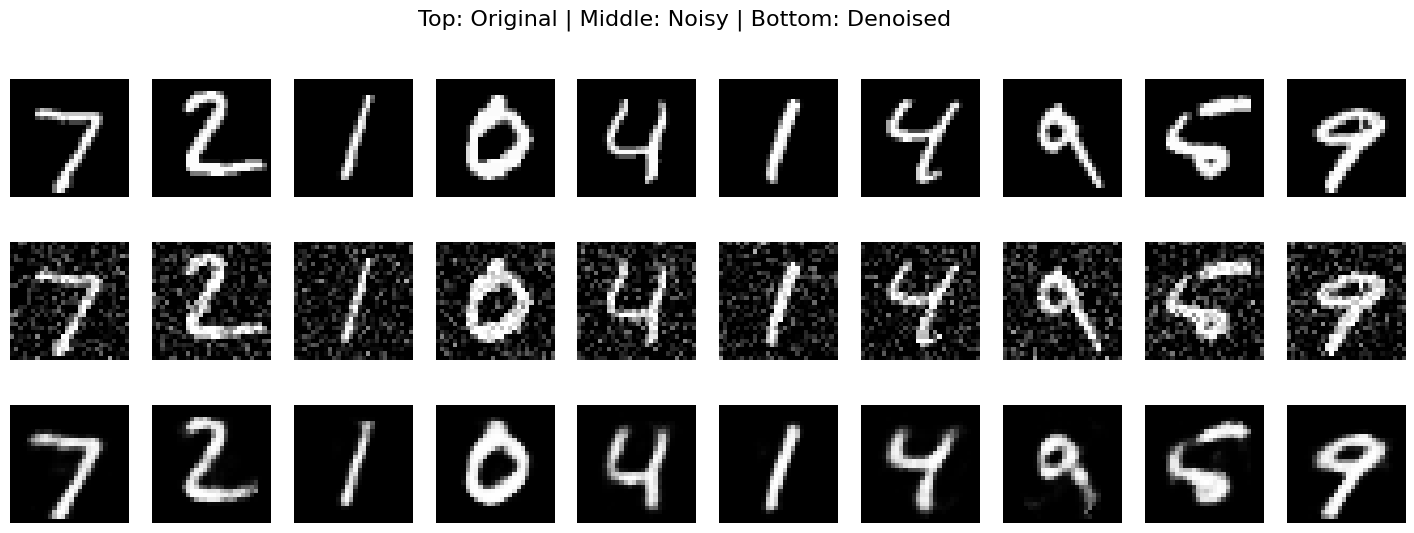

In [29]:
# Show 10 images: original, noisy, and denoised
n = 10  # number of images to show
plt.figure(figsize=(18, 6))

for i in range(n):
    # Original image
    plt.subplot(3, n, i + 1)
    plt.imshow(X_test_images[i], cmap='gray')
    plt.axis('off')

    # Noisy image
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy_images[i], cmap='gray')
    plt.axis('off')

    # Denoised (output) image
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predicted_images[i], cmap='gray')
    plt.axis('off')

plt.suptitle("Top: Original | Middle: Noisy | Bottom: Denoised", fontsize=16)
plt.show()